In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from statistics import mean
from scipy import stats

### Read in pickled df (made in cleaning)

In [2]:
df = pd.read_pickle("cleaned_df.pkl")

In [3]:
df

,Name,Platform,release_date,summary,meta_score,user_review,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23,as young boy link tricked ganondorf king gerud...,99,9.1,1998,Action,Nintendo,4.10,1.89,1.45,0.16,7.60
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,as most major publishers development efforts s...,98,7.4,2000,Sports,Activision,3.05,1.41,0.02,0.20,4.68
2,Grand Theft Auto IV,PlayStation 3,2008-04-29,"metacritic 2008 ps3 game year also known ""gta ...",98,7.7,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.57
3,SoulCalibur,Dreamcast,1999-09-08,this tale souls swords transcending world hist...,98,8.4,1999,Fighting,Namco Bandai Games,0.00,0.00,0.34,0.00,0.34
4,Grand Theft Auto IV,Xbox 360,2008-04-29,metacritic 2008 xbox 360 game year also known ...,98,7.9,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5289,Pulse Racer,Xbox,2003-01-02,pulse racer takes future racers careen toward ...,24,2.2,2003,Racing,Jaleco,0.01,0.00,0.00,0.00,0.02
5290,Fighter Within,Xbox One,2013-11-19,unleash inner fighter beat friends bare knuckl...,23,2.8,2013,Fighting,Ubisoft,0.11,0.07,0.00,0.02,0.19
5291,Homie Rollerz,DS,2008-03-05,homie rollerz fast paced mayhem laden kart rac...,23,3.0,2008,Racing,Destineer,0.07,0.00,0.00,0.01,0.07
5292,Charlie's Angels,GameCube,2003-07-09,join natalie dylan alex intense adventure base...,23,4.3,2003,Action,Ubisoft,0.01,0.00,0.00,0.00,0.02


### Visualize the data

Text(0.5, 1.0, 'Release Years')

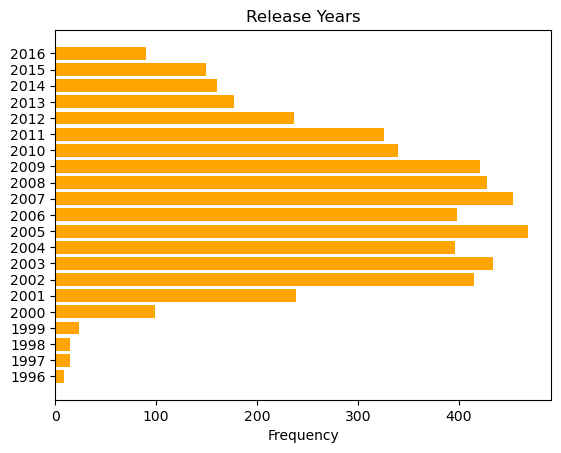

In [4]:
# distribution of years
df_sorted = df.sort_values("Year")
years = Counter(df_sorted["Year"].astype(str))
plt.barh(list(years.keys()),list(years.values()),color="orange")
plt.xlabel("Frequency")
plt.title("Release Years")

Text(0.5, 1.0, 'Gaming Platforms')

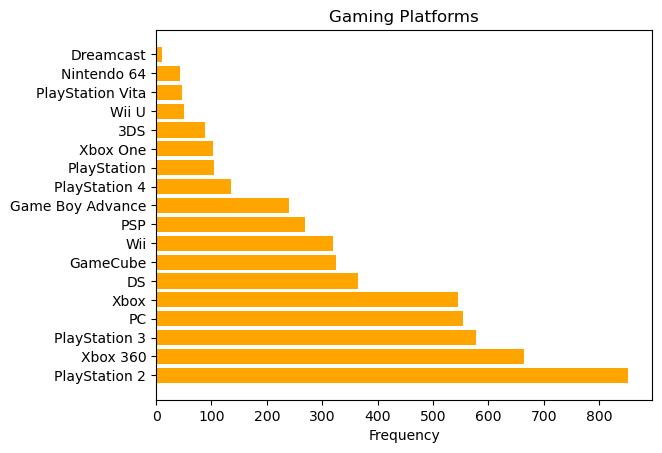

In [5]:
# distribution of platforms
platforms = Counter(df["Platform"])
platforms = dict(platforms.most_common()) # sorts them by value
plt.barh(list(platforms.keys()),list(platforms.values()),color="orange")
plt.xlabel("Frequency")
plt.title("Gaming Platforms")

Text(0.5, 1.0, 'Genres')

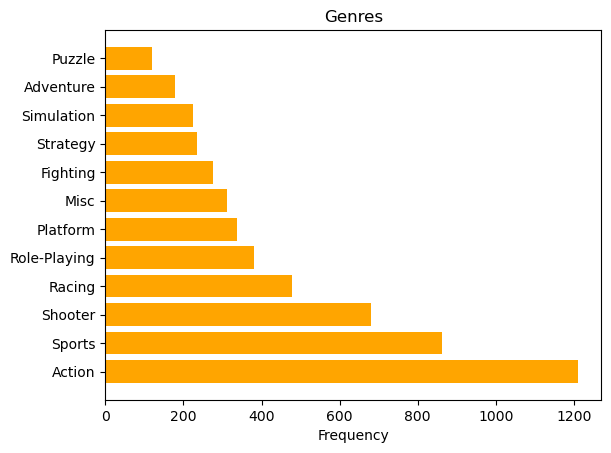

In [6]:
# distribution of genres
genres = Counter(df["Genre"])
genres = dict(genres.most_common()) # sorts them by value
plt.barh(list(genres.keys()),list(genres.values()),color="orange")
plt.xlabel("Frequency")
plt.title("Genres")

Text(0.5, 1.0, 'Global Sales')

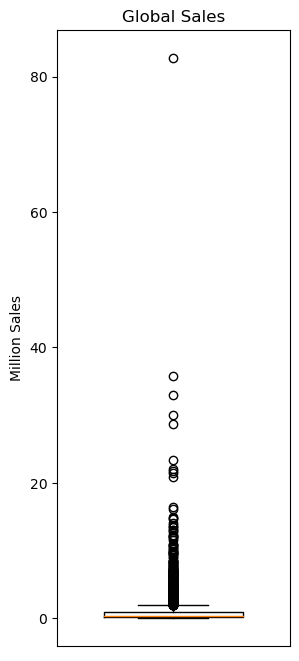

In [7]:
# Distribution of global sales (in millions)
plt.figure(figsize=(3, 8))
plt.boxplot(df["Global_Sales"],widths = 0.6)
plt.xticks([])
plt.ylabel("Million Sales")
plt.title("Global Sales")

Text(0.5, 1.0, 'Global Sales w/o Outliers')

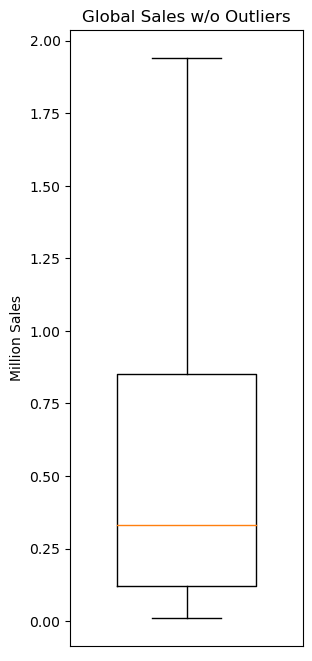

In [8]:
# now without the outliers
plt.figure(figsize=(3, 8))
plt.boxplot(df["Global_Sales"], widths = 0.6, showfliers=False)
plt.xticks([])
plt.ylabel("Million Sales")
plt.title("Global Sales w/o Outliers")

Text(0.5, 1.0, '20 Most Frequent Words in Summaries')

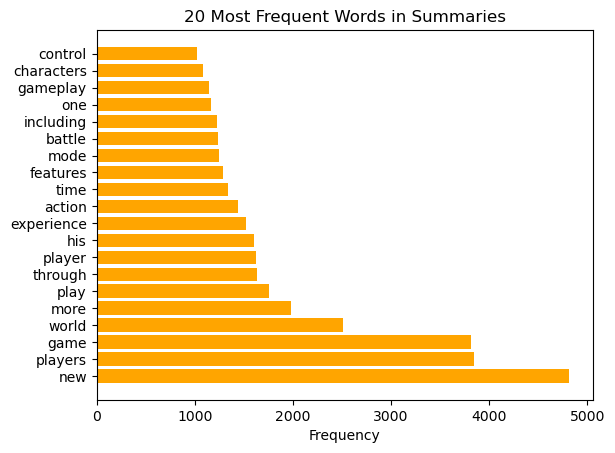

In [9]:
# what are the 20 most frequent words in all summaries?
most_freq = Counter(" ".join(df["summary"]).split()).most_common(20)
most_freq = dict(most_freq)
plt.barh(list(most_freq.keys()),list(most_freq.values()),color="orange")
plt.xlabel("Frequency")
plt.title("20 Most Frequent Words in Summaries")